[View in Colaboratory](https://colab.research.google.com/github/eurismarpires/train_music21/blob/master/lstm_music21_corpus_2.ipynb)

In [0]:
from music21 import *
import glob
import numpy as np
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.callbacks import History, ModelCheckpoint
from keras.optimizers import RMSprop
from datetime import datetime

In [0]:
path = '/home/eurismar/notebooks/Music_Generator_Demo/Pop_Music_Midi/'
#path = '/home/eurismar/notebooks/c-rnn-gan/datadir/classical/chopin'

In [0]:
files = glob.glob('{}/*.mid*'.format(path))

In [0]:
melody_corpus = []
#for file in files[:1]:
for file in files:
    midi_stream = converter.parse(file)
    part0 = midi_stream[0]
    key_sig = part0.keySignature
    for m in part0.measures(1, None):
        for nr in m.flat.notesAndRests:
            pitch = nr.pitch.midi  if isinstance(nr, note.Note) else 0
            duration = float(nr.quarterLength)
            note_repr = (pitch, duration)
            melody_corpus.append(note_repr)

In [0]:
melody_set = set(melody_corpus)

In [0]:
notes_indices = {note: i for i, note in enumerate(melody_set)}
indices_notes = {i: note for i, note in enumerate(melody_set)}

In [0]:
corpus_size = len(melody_set)
print(corpus_size)

231


In [0]:
phrase_len = 20
step_size = 3

In [0]:
phrases = []
next_notes = []

In [0]:
for i in range(0, len(melody_corpus) - phrase_len, step_size):
    phrases.append(melody_corpus[i: i + phrase_len])
    next_notes.append(melody_corpus[i + phrase_len])
print('nb sequences:', len(phrases))

nb sequences: 2327


In [0]:
# transform data into binary matrices
X = np.zeros((len(phrases), phrase_len, corpus_size), dtype=np.bool)
y = np.zeros((len(phrases), corpus_size), dtype=np.bool)
print(X.shape)
print(y.shape)

(2327, 20, 231)
(2327, 231)


In [0]:
for i, phrase in enumerate(phrases):
    for j, note in enumerate(phrase):
        X[i, j, notes_indices[note]] = 1
    y[i, notes_indices[next_notes[i]]] = 1

In [0]:
layer_size=128
batch_size = 128
nb_epoch = 200

In [0]:
model = Sequential()
model.add(LSTM(layer_size, return_sequences=True, input_shape=(phrase_len, corpus_size)))
model.add(Dropout(0.2))
model.add(LSTM(layer_size, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(corpus_size))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 20, 128)           184320    
_________________________________________________________________
dropout_3 (Dropout)          (None, 20, 128)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 231)               29799     
_________________________________________________________________
activation_2 (Activation)    (None, 231)               0         
Total params: 345,703
Trainable params: 345,703
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = History()

In [0]:
model.fit(X, y, batch_size=batch_size, epochs=nb_epoch, callbacks=[history])

Epoch 1/200
2327/2327 [==============================] - 1s - loss: 4.6327 - acc: 0.0507     
Epoch 2/200
2327/2327 [==============================] - 1s - loss: 4.2018 - acc: 0.0675     
Epoch 3/200
2327/2327 [==============================] - 1s - loss: 4.0976 - acc: 0.0791     
Epoch 4/200
2327/2327 [==============================] - 1s - loss: 4.0063 - acc: 0.0804     
Epoch 5/200
2327/2327 [==============================] - 1s - loss: 3.9497 - acc: 0.0847     
Epoch 6/200
2327/2327 [==============================] - 1s - loss: 3.8838 - acc: 0.0945     
Epoch 7/200
2327/2327 [==============================] - 1s - loss: 3.8273 - acc: 0.0881     
Epoch 8/200
2327/2327 [==============================] - 1s - loss: 3.7851 - acc: 0.1053     
Epoch 9/200
2327/2327 [==============================] - 1s - loss: 3.7622 - acc: 0.1057     
Epoch 10/200
2327/2327 [==============================] - 1s - loss: 3.7316 - acc: 0.0976     
Epoch 11/200
2327/2327 [==============================] - 1

2327/2327 [==============================] - 1s - loss: 1.4694 - acc: 0.5784     
Epoch 87/200
2327/2327 [==============================] - 1s - loss: 1.4282 - acc: 0.5784     
Epoch 88/200
2327/2327 [==============================] - 1s - loss: 1.4305 - acc: 0.5844     
Epoch 89/200
2327/2327 [==============================] - 1s - loss: 1.3977 - acc: 0.6016     
Epoch 90/200
2327/2327 [==============================] - 1s - loss: 1.4091 - acc: 0.5948     
Epoch 91/200
2327/2327 [==============================] - 1s - loss: 1.3422 - acc: 0.6154     
Epoch 92/200
2327/2327 [==============================] - 1s - loss: 1.3481 - acc: 0.6016     
Epoch 93/200
2327/2327 [==============================] - 1s - loss: 1.2867 - acc: 0.6420     
Epoch 94/200
2327/2327 [==============================] - 1s - loss: 1.2678 - acc: 0.6343     
Epoch 95/200
2327/2327 [==============================] - 1s - loss: 1.2687 - acc: 0.6437     
Epoch 96/200
2327/2327 [==============================] - 1s - 

2327/2327 [==============================] - 1s - loss: 0.3261 - acc: 0.9188     
Epoch 172/200
2327/2327 [==============================] - 1s - loss: 0.3074 - acc: 0.9244     
Epoch 173/200
2327/2327 [==============================] - 1s - loss: 0.3181 - acc: 0.9257     
Epoch 174/200
2327/2327 [==============================] - 1s - loss: 0.2700 - acc: 0.9351     
Epoch 175/200
2327/2327 [==============================] - 1s - loss: 0.3027 - acc: 0.9257     
Epoch 176/200
2327/2327 [==============================] - 1s - loss: 0.2861 - acc: 0.9300     
Epoch 177/200
2327/2327 [==============================] - 1s - loss: 0.2964 - acc: 0.9205     
Epoch 178/200
2327/2327 [==============================] - 1s - loss: 0.2691 - acc: 0.9390     
Epoch 179/200
2327/2327 [==============================] - 1s - loss: 0.2953 - acc: 0.9218     
Epoch 180/200
2327/2327 [==============================] - 1s - loss: 0.2512 - acc: 0.9325     
Epoch 181/200
2327/2327 [=============================

In [0]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'acc'])


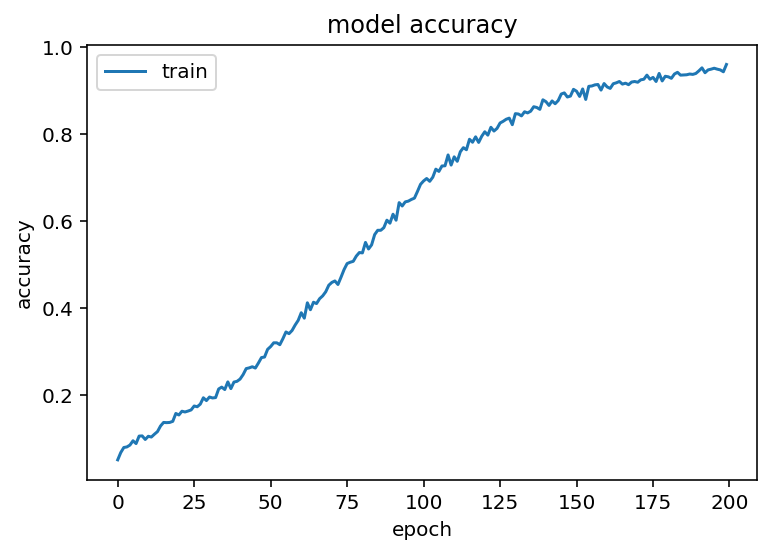

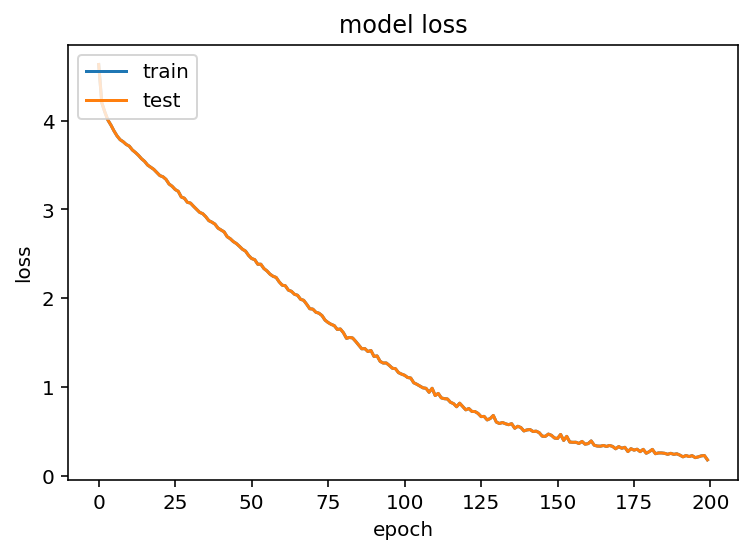

In [0]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [0]:
gen_melody_indices = np.zeros((1, phrase_len, len(melody_set)))
print(gen_melody_indices.shape)

(1, 20, 231)


In [0]:
start_pos = np.random.randint(0, len(melody_corpus) - phrase_len)

In [0]:
seed_phrase = melody_corpus[start_pos : start_pos + phrase_len]

In [0]:
gen_melody = seed_phrase

In [0]:
seq_len = 20

In [0]:
start = np.random.randint(0, len(phrases)-1)
pattern = phrases[start]
print('pattern original:')
print(pattern)
nova_sequencia = []
for i in range(seq_len):
    gen_melody_indices = np.zeros((1, phrase_len, len(melody_set)))
    for j, note in enumerate(pattern):
        gen_melody_indices[0, j, notes_indices[note]] = 1
    x = gen_melody_indices
    prediction = model.predict(x, verbose=0)[0]
    index = np.argmax(prediction)
    result = indices_notes[index]
    print('result:',result)
    nova_sequencia.append(result)
    pattern.append(result)
    pattern = pattern[1:len(pattern)]
    print('pattern {}:'.format(i))
    print(pattern)

pattern original:
[(0, 1.5), (0, 4.0), (0, 0.5), (57, 0.5), (64, 0.5), (64, 0.5), (64, 0.5), (64, 0.5), (65, 0.5), (64, 0.5), (64, 0.5), (60, 1.0), (60, 1.0), (64, 1.0), (62, 0.5), (62, 0.5), (64, 0.5), (62, 0.5), (64, 0.5), (62, 1.5)]
result: (64, 0.5)
pattern 0:
[(0, 4.0), (0, 0.5), (57, 0.5), (64, 0.5), (64, 0.5), (64, 0.5), (64, 0.5), (65, 0.5), (64, 0.5), (64, 0.5), (60, 1.0), (60, 1.0), (64, 1.0), (62, 0.5), (62, 0.5), (64, 0.5), (62, 0.5), (64, 0.5), (62, 1.5), (64, 0.5)]
result: (62, 1.0)
pattern 1:
[(0, 0.5), (57, 0.5), (64, 0.5), (64, 0.5), (64, 0.5), (64, 0.5), (65, 0.5), (64, 0.5), (64, 0.5), (60, 1.0), (60, 1.0), (64, 1.0), (62, 0.5), (62, 0.5), (64, 0.5), (62, 0.5), (64, 0.5), (62, 1.5), (64, 0.5), (62, 1.0)]
result: (64, 0.5)
pattern 2:
[(57, 0.5), (64, 0.5), (64, 0.5), (64, 0.5), (64, 0.5), (65, 0.5), (64, 0.5), (64, 0.5), (60, 1.0), (60, 1.0), (64, 1.0), (62, 0.5), (62, 0.5), (64, 0.5), (62, 0.5), (64, 0.5), (62, 1.5), (64, 0.5), (62, 1.0), (64, 0.5)]
result: (62, 1.0)

In [0]:
nova_sequencia

[(64, 0.5),
 (62, 1.0),
 (64, 0.5),
 (62, 1.0),
 (60, 1.0),
 (76, 0.5),
 (76, 0.5),
 (76, 0.5),
 (76, 0.5),
 (69, 0.5),
 (69, 0.5),
 (69, 0.5),
 (76, 0.5),
 (76, 0.5),
 (76, 1.0),
 (76, 1.0),
 (74, 1.0),
 (76, 1.0),
 (74, 1.0),
 (76, 0.5)]

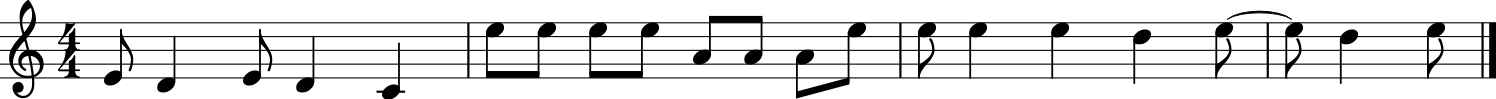

In [0]:
from music21 import *
sc = stream.Score()
for t in nova_sequencia:
    if t[1] == 0.0:
        r = note.Rest(quarterLength = 0.25)
        sc.append(r)
    else:
        n = note.Note(midi=t[0], quarterLength=t[1])
        sc.append(n)
sc.show()

In [0]:
filename = "gerada_" + datetime.now().strftime("%Y%m%d-%H%M%S"+".mid")

In [0]:
from music21 import *
mf = midi.translate.streamToMidiFile(sc)
mf.open(filename, 'wb')
mf.write()
mf.close()

In [0]:
!ls gerada_20180627-011258.mid

gerada_20180627-011258.mid


In [0]:
!pwd

/home/eurismar/notebooks/JohaNN
